Imports

In [1]:
#Imports

import os
import requests
import json
import pandas as pd
import numpy as np
import alpaca_trade_api as alpaca
from alpaca_trade_api import REST, TimeFrame


Uber data

In [23]:
# Read Uber data from IPO 5.10.19 - 12.25.21

uber = pd.read_csv("Data/uber.csv",
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True
)

uber


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
2019-05-17,41.980000,43.290001,41.270000,41.910000,41.910000,20225700
...,...,...,...,...,...,...
2021-12-17,37.200001,40.000000,36.740002,39.680000,39.680000,50940600
2021-12-20,38.450001,40.148998,38.080002,39.700001,39.700001,28153700
2021-12-21,39.820000,42.080002,39.820000,41.970001,41.970001,28385200


Close price plot

<AxesSubplot:xlabel='Date'>

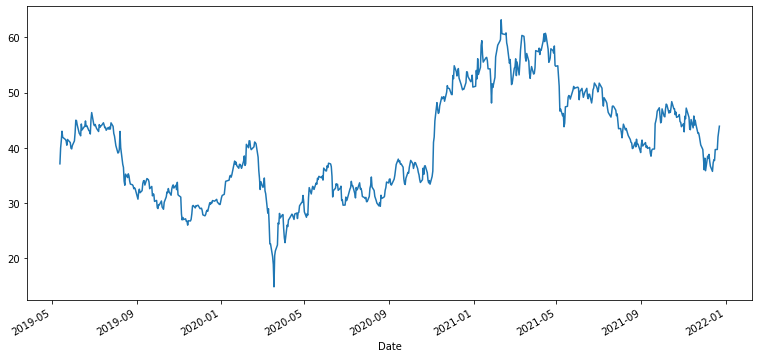

In [3]:
# Plot close price column

uber["Close"].plot(
    figsize=(13,6)
)


Sharpe Ratio

In [27]:
# Annual Returns

uber_annual_returns = (uber["Close"].pct_change().dropna()).mean() * 252


# Annual std Deviation

uber_annual_std = ((uber["Close"].pct_change().dropna()).std()) * np.sqrt(252)


# Sharpe

uber_sharpe = uber_annual_returns / uber_annual_std


print(f"returns    {uber_annual_returns}")

print(f"std    {uber_annual_std}")

print(f"sharpe    {uber_sharpe}")


returns    0.23136846334918765
std    0.5866180242624635
sharpe    0.3944107643812684


Sliced - Close price plot

<AxesSubplot:xlabel='Date'>

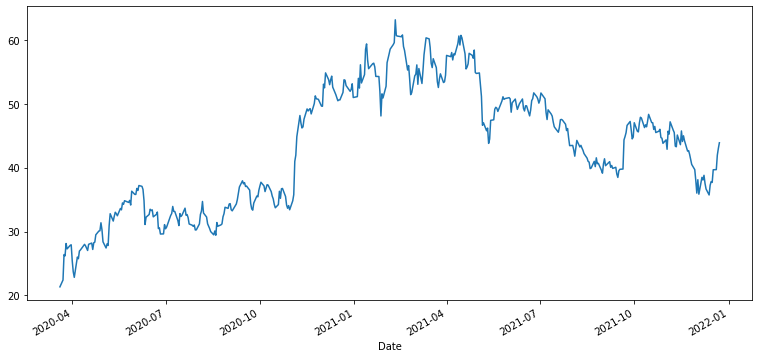

In [24]:
# Plot close price column after pandemic crash

uber_sliced = uber["Close"].loc["2020-3-20":"2021-12-25"]

uber_sliced.plot(
    figsize=(13,6)
)


Sliced - Sharpe

In [26]:
# annual returns

uber_sliced_annual_returns = (uber_sliced.pct_change().dropna()).mean() * 252


# annual std deviation

uber_sliced_annual_std = ((uber_sliced.pct_change().dropna()).std()) * np.sqrt(252)


# sharpe ratio

uber_sliced_sharpe = uber_sliced_annual_returns / uber_sliced_annual_std


print(f"sliced returns    {uber_sliced_annual_returns}")

print(f"sliced std    {uber_sliced_annual_std}")

print(f"sliced sharpe    {uber_sliced_sharpe}")


sliced returns    0.5419534431344384
sliced std    0.5202069175011885
sliced sharpe    1.0418036071832901
